Part 2 refers to the midi data format
Using the package Pretty_Midi, we can easily investigate a lot of properties of the midi-files. Following some examples are made using the midi-file of the song "Shape of you" by Ed Sheran.

Setting everything up

In [2]:
import pretty_midi as pr
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
# For putting audio in the notebook
import IPython.display

#creating a Pretty_midi object
pm = pr.PrettyMIDI('C:/Users/Florian/Documents/GitHub/Tresillo/dataset/tresillo midi billboards/Shape of you-Ed Sheran.mid')

Some explority of the attributes of the midi file

In [3]:
#Printing out the length of the midi file in seconds. Usually midi-times come in ticks, but with knowledge about the reolution and the tempo we can convert the ticks into a time in seconds
length = pm.get_end_time()

#How to acess the information about the tempo that is saved in the midi file


We can visualize our midi with all voices as a piano roll.

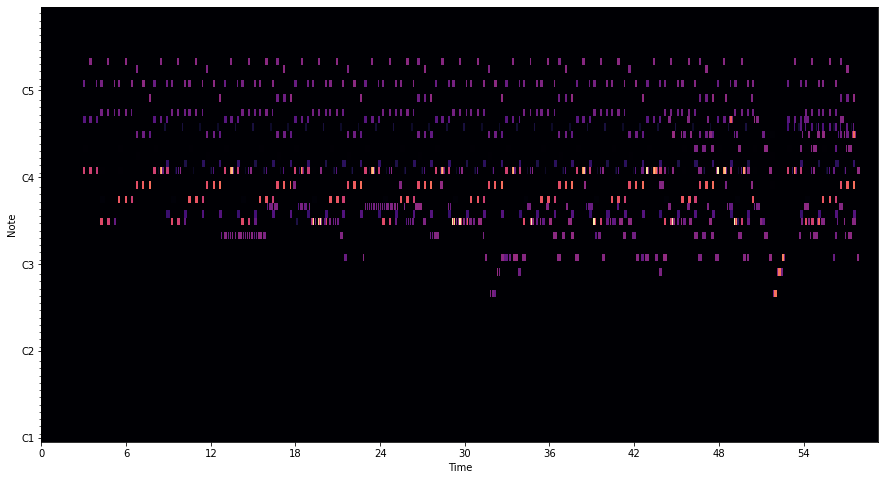

In [9]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pr.note_number_to_hz(start_pitch))
    
plt.figure(figsize=(15, 8))
plot_piano_roll(pm, 24,84)

For our analysis, we want to explore the rythm of differnet voices within the midi file. Our "Pretty_midi" contains all instruments in form of a "Instrument" object.

In [5]:
#Instruments are labeled with numbers in the raw midi, which can be unpractical
instrument = pm.instruments[0] #the first instrument as saved in the midi file
instrument_name = pr.program_to_instrument_name(pm.instruments[0].program) #the name of the first instrument for intuitiv understanding

Plotting the piano roll of just the xylophon.

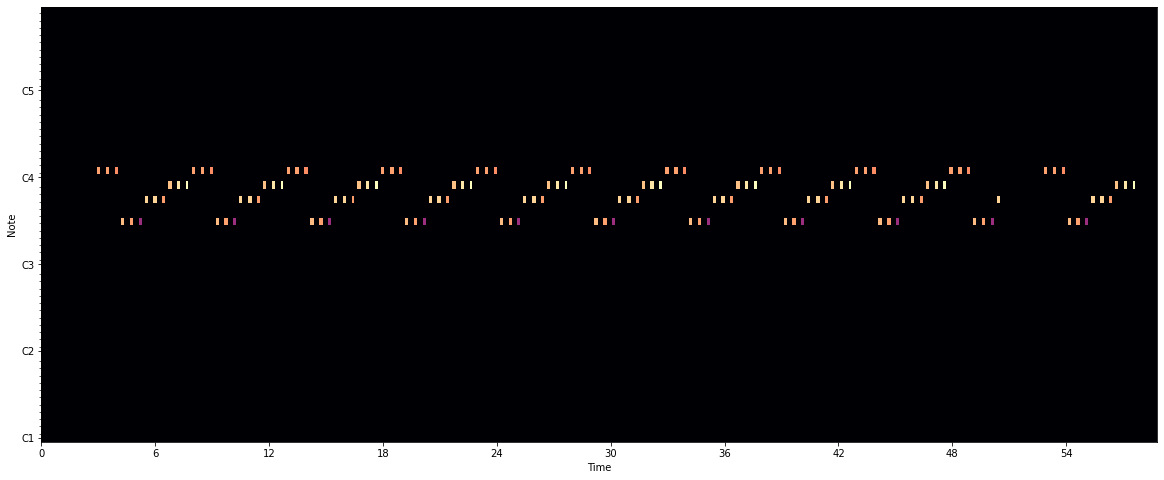

In [6]:
plt.figure(figsize=(20, 8))
plot_piano_roll(pm.instruments[0], 24,84)

Next, we want to explore the different notes played by each instrument. In raw midi format, a note is represented trough its onset and offset time. Our "Pretty_midi" object contains already each note as a "Note" object. 

In [7]:
#example of all the notes of the xylophon saved in a list
all_xylophon_notes = pm.instruments[0].notes

For our project we are especially interested in the onsets of each note. 

In [8]:
one_single_onset = all_xylophon_notes[50].start